# TCModel for Image-Derived Input Functions and Twilite Data

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Boxcar import Boxcar
from RadialArtery import RadialArtery
from Raichle1983Model import Raichle1983Model

In [22]:
# define data & models
petdir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421152358", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
kern = os.path.join(petdir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-select-all.nii.gz")
bc = Boxcar(idif, 
            truths=[13.645239325355200, 11.606092100541100, 53.709703614415100,
                    0.9508763104539800, 6.115187219628200, 1.5953575251551600, -0.9738875457526370, -0.0003611596906374450, 23.08907726925360,
                    0.06025649665687820, 0.02786817660202240, 0.021930942607943000, 
                    2.4547786756263200,
                    0.0009998703920191730],
            nlive=100)
ra = RadialArtery(twil, 
                  kern, 
                  truths=[11.484636938903700, 9.038382807893550, 28.568246786745600,
                          4.5866245255678400, 11.95532505177820, 2.566526335309770, -4.459469081789230, -6.0112371284438400, 25.2540519845093, 
                          0.020278321953784300, 0.008119846365675890, 0.07320044514638420,
                          2.442656141915740, 
                          0.02215511898025070],
                  nlive=100)
rm = Raichle1983Model(idif, 
                      pet,
                      truths=[0.012, 1.2, 0.019, 6.3, -3, 0.05],
                      nlive=100)

Boxcar: found data for tracer ho
RadialArtery: found data for tracer ho
{'fqfp': '/Users/jjlee/PycharmProjects/dynesty/idif2024/data/ses-20210421152358/pet/sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif',
 'halflife': 122.2416,
 'img': array([4.39040844e+02, 4.39040844e+02, 4.39040844e+02, 4.39040844e+02,
       4.39040844e+02, 4.39040844e+02, 5.15804459e+02, 1.03637871e+03,
       3.01156371e+03, 1.18484100e+04, 3.06868338e+04, 6.89811464e+04,
       1.33755170e+05, 2.27275805e+05, 3.08713562e+05, 4.13606613e+05,
       5.00036961e+05, 5.51573900e+05, 6.11862231e+05, 6.70551883e+05,
       6.76872233e+05, 6.52744402e+05, 6.00598639e+05, 5.22133020e+05,
       4.54145767e+05, 3.72584338e+05, 3.00884036e+05, 2.50282882e+05,
       2.04249976e+05, 1.52533043e+05, 1.23726374e+05, 1.14370871e+05,
       1.03374302e+05, 9.38527624e+04, 8.38325395e+04, 7.47533759e+04,
       7.00571832e+04, 7.03026891e+04, 6.45509326e+04, 6.47011319e+04,
       5.94447004e+04, 6.08992451e+04, 5.95234

## Inspect Boxcar

In [4]:
v = bc.truths
pprint("===================================== v ======================================")
pprint(v)

data = bc.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[13.6452393253552,
 11.6060921005411,
 53.7097036144151,
 0.95087631045398,
 6.1151872196282,
 1.59535752515516,
 -0.973887545752637,
 -0.000361159690637445,
 23.0890772692536,
 0.0602564966568782,
 0.0278681766020224,
 0.021930942607943,
 2.45477867562632,
 0.000999870392019173]
'==================================== data ===================================='
{'halflife': 122.2416,
 'kernel': None,
 'rho': array([5.95743747e-04, 7.03885862e-04, 1.42232294e-03, 4.15656303e-03,
       1.64461774e-02, 4.28370505e-02, 9.68412683e-02, 1.88844013e-01,
       3.22707033e-01, 4.40832411e-01, 5.93974587e-01, 7.22179372e-01,
       8.01141561e-01, 8.93761788e-01, 9.85060956e-01, 1.00000000e+00,
       9.69837651e-01, 8.97434600e-01, 7.84625119e-01, 6.86339353e-01,
       5.66279458e-01, 4.59904799e-01, 3.84735734e-01, 3.15759171e-01,
       2.37148551e-01, 1.93455646e-01, 1.79844489e-01, 1.63477083e-01,
       1.492

In [5]:
pprint("============================== bc.data2t(data) ===============================")
pprint(bc.data2t(data))
pprint("============================= bc.data2taus(data) =============================")
pprint(bc.data2taus(data))
pprint("=========================== bc.data2timesMid(data) ===========================")
pprint(bc.data2timesMid(data))
pprint("================================== bc.fqfp ===================================")
pprint(bc.fqfp)
pprint("========================== bc.input_func_measurement =========================")
pprint(bc.input_func_measurement)
pprint("================================= bc.labels ==================================")
pprint(bc.labels)
pprint("====================== bc.load_nii(bc.fqfp + '.nii.gz') ======================")
pprint(bc.load_nii(bc.fqfp + ".nii.gz"))
pprint("=============================== bc.loglike(v) ================================")
pprint(bc.loglike(v))
pprint("================================== bc.ndim ===================================")
pprint(bc.ndim)
pprint("========================= bc.parse_halflife(bc.fqfp) =========================")
pprint(bc.parse_halflife(bc.fqfp))
pprint("========================= bc.parse_isotope(bc.fqfp) ==========================")
pprint(bc.parse_isotope(bc.fqfp))
pprint("================================== bc.sigma ==================================")
pprint(bc.sigma)
pprint("============================ bc.signalmodel(data) ============================")
pprint(bc.signalmodel(data))

'============================== bc.data2t(data) ==============================='
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118.])
'============================= bc.data2taus(data) ============================='
array([10., 10., 10., 10., 10., 10., 10., 10.,

In [6]:
# pprint("========================== bc.prior_transform('ho') ==========================")
# pprint(bc.prior_transform("ho"))
# pprint("======================== bc.prior_transform_default(v) =======================")
# pprint(bc.prior_transform_default(v))
# pprint("========================== bc.prior_transform_co(v) ==========================")
# pprint(bc.prior_transform_co(v))
# pprint("========================== bc.prior_transform_oo(v) ==========================")
# pprint(bc.prior_transform_oo(v))

## Plot Boxcar

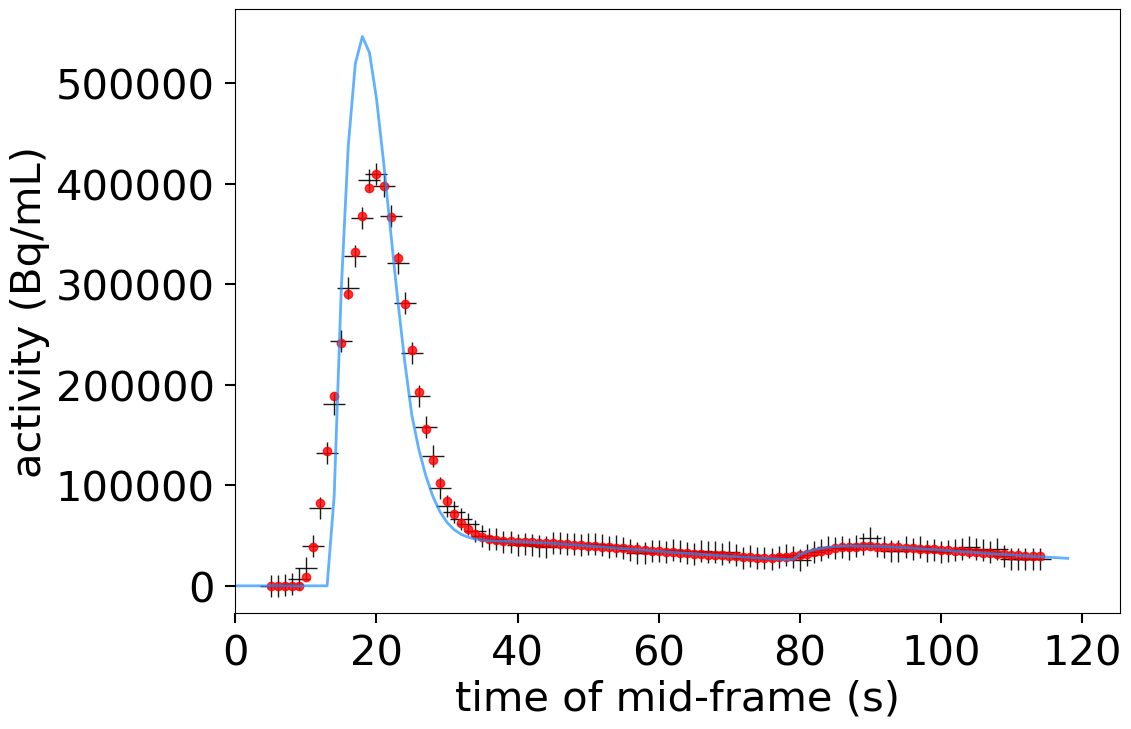

In [7]:
bc.plot_truths(bc.truths)

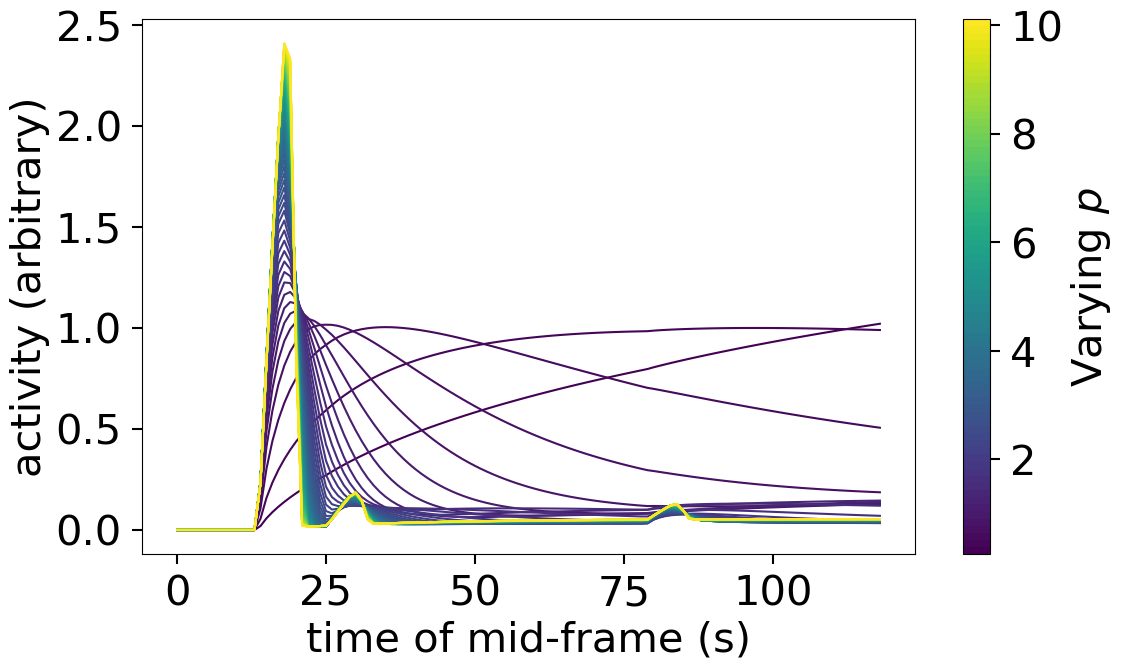

In [8]:
bc.plot_variations(5, 0.25, 10.25 , bc.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [10]:
# de novo
res = bc.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(bc.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

iter: 406 | batch: 0 | bound: 2 | nc: 112 | ncall: 9515 | eff(%):  4.223 | loglstar:   -inf < -386.725 <    inf | logz: -394.777 +/-    nan | dlogz: 475.696 >  0.010                                 Traceback (most recent call last):
  File "/Users/jjlee/anaconda3/envs/dynesty/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 3185, in ndim
    return a.ndim
AttributeError: 'int' object has no attribute 'ndim'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jjlee/PycharmProjects/dynesty/dynesty-master/py/dynesty/dynesty.py", line 913, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/Artery.py", line 132, in loglike
    rho_pred, _, _ = self.signalmodel(data)
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/Boxcar.py", line 67, in signalmodel
    rho_ = A * Boxcar.solution_4bolus(t_ideal, t_0, tau_2, tau_3, a, b, p, 

Exception while calling loglikelihood function:
  params: [ 8.72401120e+00  4.41856134e+01  2.37290056e+01  1.81945282e+00
  1.33039228e+01  9.69404656e+00 -5.12010462e+00 -4.80501676e+00
  1.24735988e+02  2.52833523e-01  3.42823200e-02  8.15446976e-02
  1.30273871e+00  8.91950662e-02]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

## Inspect RadialArtery

In [11]:
v = ra.truths
pprint("===================================== v ======================================")
pprint(v)

data = ra.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[11.4846369389037,
 9.03838280789355,
 28.5682467867456,
 4.58662452556784,
 11.9553250517782,
 2.56652633530977,
 -4.45946908178923,
 -6.01123712844384,
 25.2540519845093,
 0.0202783219537843,
 0.00811984636567589,
 0.0732004451463842,
 2.44265614191574,
 0.0221551189802507]
'==================================== data ===================================='
{'halflife': 122.2416,
 'kernel': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00474594, 0.10643181, 0.08525183, 0.07242634, 0.06271453,
       0.05503421, 0.04877346, 0.04355563, 0.03913338, 0.03533594,
       0.03204061, 0.02915633, 0.0266137 , 0.02435865, 0.02234826,
       0.02054791, 0.01892928, 0.01746894, 0.01614732, 0.0149479 ,
       0.01385661, 0.01286143, 0.01195198, 0.01111926, 0.01035544,
       0.00965365, 0.00900786, 0.00841273, 0.00786356, 0.0

In [12]:
pprint("============================== ra.data2t(data) ===============================")
pprint(ra.data2t(data))
pprint("============================= ra.data2taus(data) =============================")
pprint(ra.data2taus(data))
pprint("=========================== ra.data2timesMid(data) ===========================")
pprint(ra.data2timesMid(data))
pprint("================================== ra.fqfp ===================================")
pprint(ra.fqfp)
pprint("========================== ra.input_func_measurement =========================")
pprint(ra.input_func_measurement)
pprint("============================ ra.kernel_measurement ===========================")
pprint(ra.kernel_measurement)
pprint("================================= ra.labels ==================================")
pprint(ra.labels)
pprint("=============================== ra.loglike(v) ================================")
pprint(ra.loglike(v))
pprint("====================== ra.load_nii(ra.fqfp + '.nii.gz') ======================")
pprint(ra.load_nii(ra.fqfp + ".nii.gz"))
pprint("================================== ra.ndim ===================================")
pprint(ra.ndim)
pprint("========================= ra.parse_halflife(ra.fqfp) =========================")
pprint(ra.parse_halflife(ra.fqfp))
pprint("========================= ra.parse_isotope(ra.fqfp) ==========================")
pprint(ra.parse_isotope(ra.fqfp))
pprint("================================== ra.sigma ==================================")
pprint(ra.sigma)
pprint("============================ ra.signalmodel(data) ============================")
pprint(ra.signalmodel(data))

'============================== ra.data2t(data) ==============================='
array([-8.5000e-01,  1.5000e-01,  1.1500e+00,  2.1500e+00,  3.1500e+00,
        4.1500e+00,  5.1500e+00,  6.1500e+00,  7.1500e+00,  8.1500e+00,
        9.1500e+00,  1.0150e+01,  1.1150e+01,  1.2150e+01,  1.3150e+01,
        1.4150e+01,  1.5150e+01,  1.6150e+01,  1.7150e+01,  1.8150e+01,
        1.9150e+01,  2.0150e+01,  2.1150e+01,  2.2150e+01,  2.3150e+01,
        2.4150e+01,  2.5150e+01,  2.6150e+01,  2.7150e+01,  2.8150e+01,
        2.9150e+01,  3.0150e+01,  3.1150e+01,  3.2150e+01,  3.3150e+01,
        3.4150e+01,  3.5150e+01,  3.6150e+01,  3.7150e+01,  3.8150e+01,
        3.9150e+01,  4.0150e+01,  4.1150e+01,  4.2150e+01,  4.3150e+01,
        4.4150e+01,  4.5150e+01,  4.6150e+01,  4.7150e+01,  4.8150e+01,
        4.9150e+01,  5.0150e+01,  5.1150e+01,  5.2150e+01,  5.3150e+01,
        5.4150e+01,  5.5150e+01,  5.6150e+01,  5.7150e+01,  5.8150e+01,
        5.9150e+01,  6.0150e+01,  6.1150e+01,  6.2150e+

In [13]:
# pprint("========================== ra.prior_transform('ho') ==========================")
# pprint(ra.prior_transform("ho"))
# pprint("========================== ra.prior_transform_co(v) ==========================")
# pprint(ra.prior_transform_co(v))
# pprint("========================== ra.prior_transform_oo(v) ==========================")
# pprint(ra.prior_transform_oo(v))
# pprint("======================== ra.prior_transform_default(v) =======================")
# pprint(ra.prior_transform_default(v))

## Plot RadialArtery

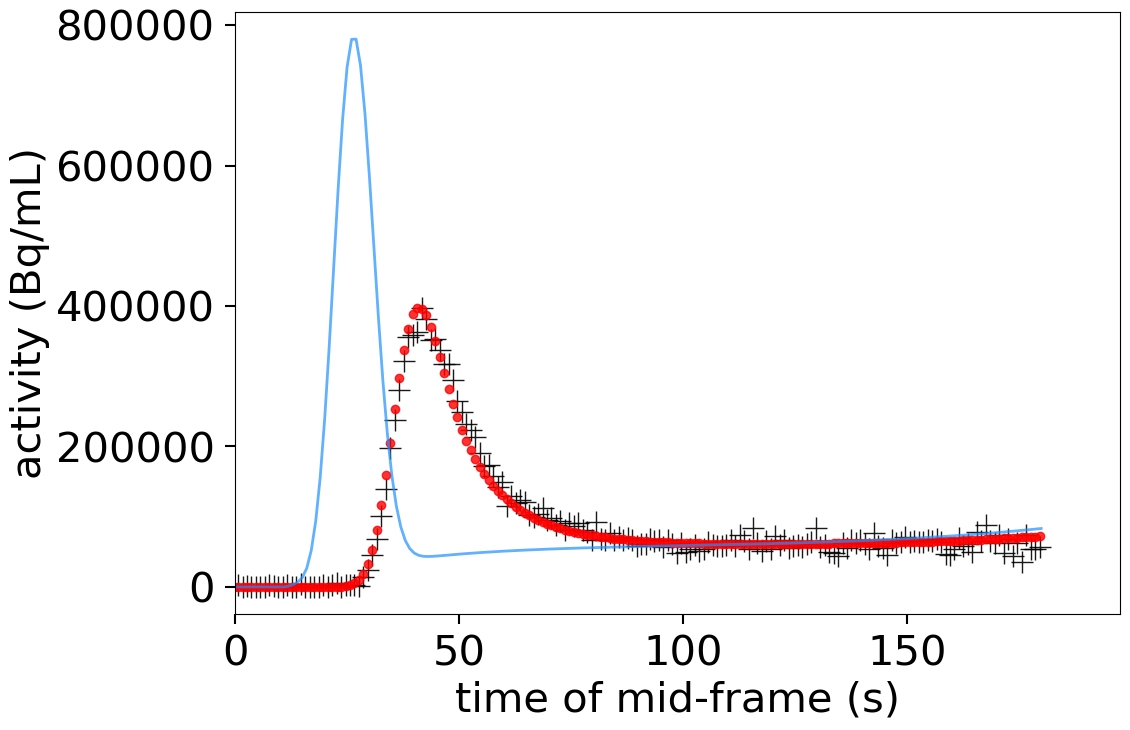

In [14]:
ra.plot_truths(ra.truths)

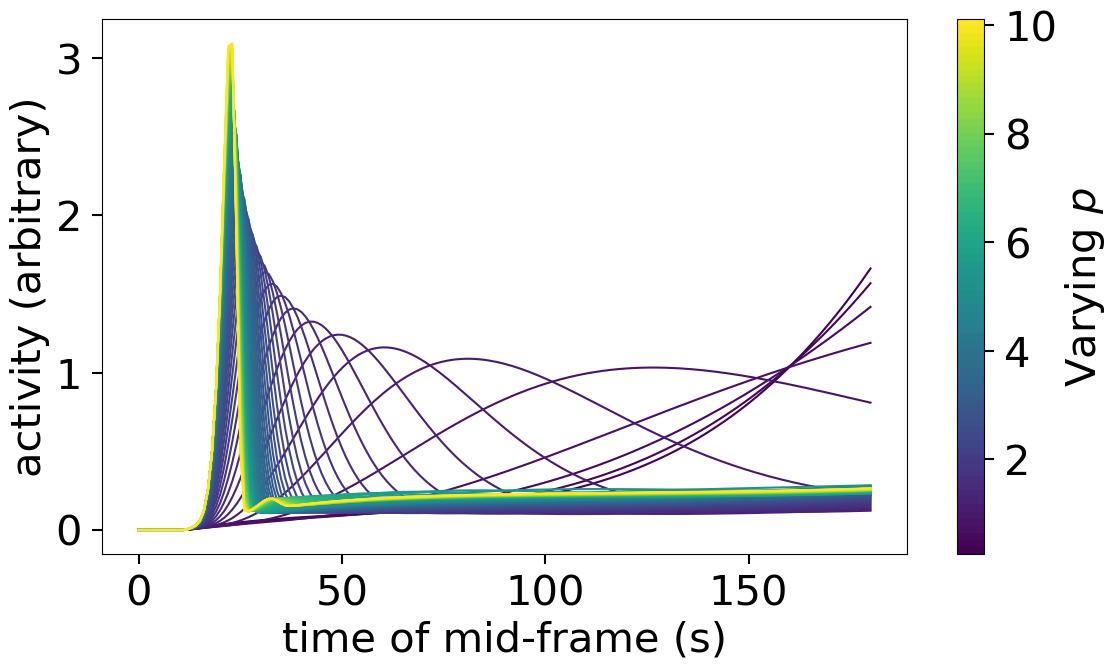

In [15]:
ra.plot_variations(5, 0.25, 10.25, ra.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [16]:
# de novo
res2 = ra.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(ra.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

iter: 1690 | batch: 0 | bound: 39 | nc: 112 | ncall: 132557 | eff(%):  1.274 | loglstar:   -inf < 362.579 <    inf | logz: 343.566 +/-  0.422 | dlogz: 30.370 >  0.010                                Traceback (most recent call last):
  File "/Users/jjlee/PycharmProjects/dynesty/dynesty-master/py/dynesty/dynesty.py", line 913, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/Artery.py", line 132, in loglike
    rho_pred, _, _ = self.signalmodel(data)
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/RadialArtery.py", line 99, in signalmodel
    rho_ = A * RadialArtery.solution_4bolus(t_ideal, t_0, tau_2, tau_3, a, b, p, dp_2, dp_3, g, f_2, f_3, f_ss)
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/Artery.py", line 350, in solution_4bolus
    rho = (f_1_ * Artery.solution_1bolus(t, t_0, a, b, p) +
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/Artery.py", line 316, in solution_1bolus
  

Exception while calling loglikelihood function:
  params: [ 3.02971178e+00  4.74442763e+01  7.61624829e+00  1.23068535e+01
  1.21191408e+01  2.36815528e+00 -7.82478747e+00 -7.12734353e+00
  5.28405183e+01  4.75036721e-02  9.26759972e-02  8.03317717e-02
  2.38008910e+00  3.81850825e-02]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

## Inspect Raichle1983Model

In [17]:
v = rm.truths
pprint("===================================== v ======================================")
pprint(v)

data = rm.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.012, 1.2, 0.019, 6.3, -3, 0.05]
'==================================== data ===================================='
{'halflife': 122.2416,
 'inputFuncInterp': array([3.98831556e-02, 7.40687175e-02, 1.08772240e-02, 2.02005588e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.81705648e-02,
       1.16911662e-01, 5.09823630e-02, 0.00000000e+00, 4.40268572e-02,
       8.17641634e-02, 6.73351980e-03, 7.72504874e-02, 1.20241419e-01,
       2.58981512e-03, 4.80965666e-03, 6.73351950e-03, 4.41008526e-02,
       5.86778120e-02, 4.81705619e-02, 1.79067220e-01, 1.66414124e-01,
       4.40268577e-02, 1.17503613e-01, 1.14543826e-01, 1.16911660e-01,
       2.48326286e-01, 7.13013146e-01, 1.29253982e+00, 2.17751667e+00,
       3.23356930e+00, 4.61460672e+00, 6.41119853e+00, 8.45108519e+00,
       1.00387159e+01, 1.16435135e+01, 1.31032811e+01, 1.39628038e+01,
       1.40178559e+01, 1.44878701e+01, 1.50549656e

In [18]:
pprint("============================== rm.data2t(data) ===============================")
pprint(rm.data2t(data))
pprint("============================= rm.data2taus(data) =============================")
pprint(rm.data2taus(data))
pprint("=========================== rm.data2timesMid(data) ===========================")
pprint(rm.data2timesMid(data))
pprint("================================== rm.fqfp ===================================")
pprint(rm.fqfp)
pprint("========================== rm.input_function() =========================")
pprint(rm.input_function())
pprint("================================= rm.labels ==================================")
pprint(rm.labels)
pprint("====================== rm.load_nii(rm.fqfp + '.nii.gz') ======================")
pprint(rm.load_nii(rm.fqfp + ".nii.gz"))
pprint("=============================== rm.loglike(v) ================================")
pprint(rm.loglike(v))
pprint("================================== rm.ndim ===================================")
pprint(rm.ndim)
pprint("========================= rm.parse_halflife(rm.fqfp) =========================")
pprint(rm.parse_halflife(rm.fqfp))
pprint("========================= rm.parse_isotope(rm.fqfp) ==========================")
pprint(rm.parse_isotope(rm.fqfp))
pprint("================================== rm.sigma ==================================")
pprint(rm.sigma)
pprint("============================ rm.signalmodel(data) ============================")
pprint(rm.signalmodel(data))

'============================== rm.data2t(data) ==============================='
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118.])
'============================= rm.data2taus(data) ============================='
array([10., 10., 10., 10., 10., 10., 10., 10.,

## Plot Raichle1983Model

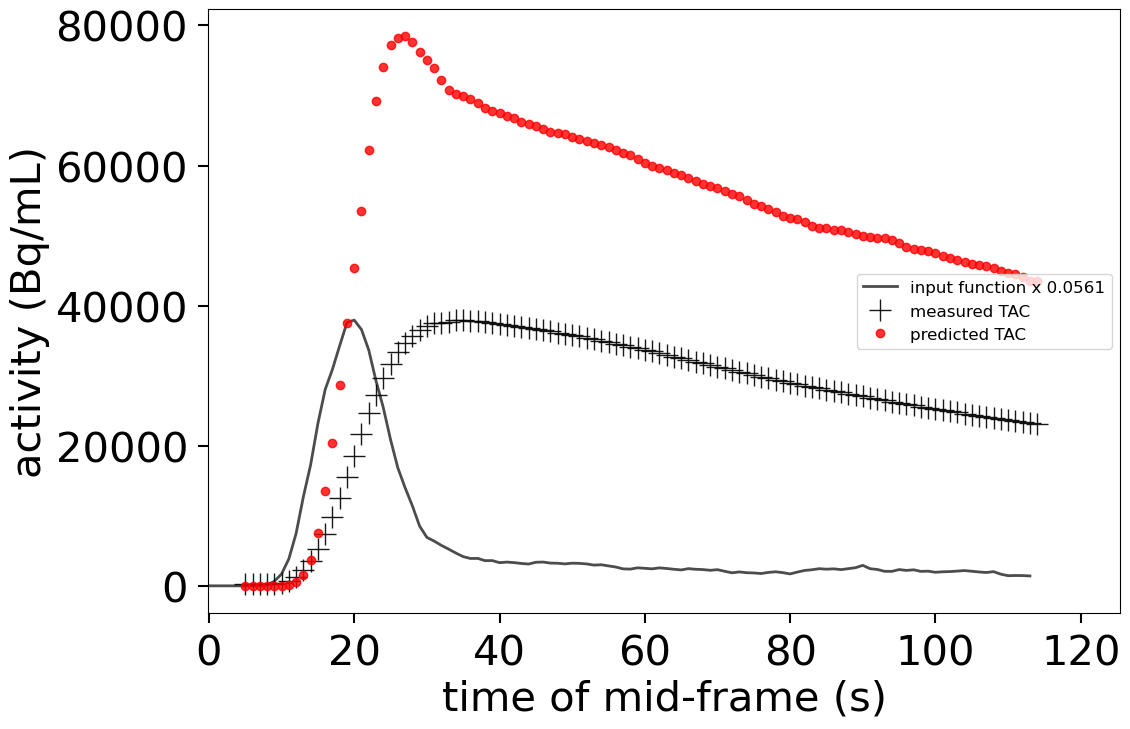

In [23]:
rm.plot_truths()

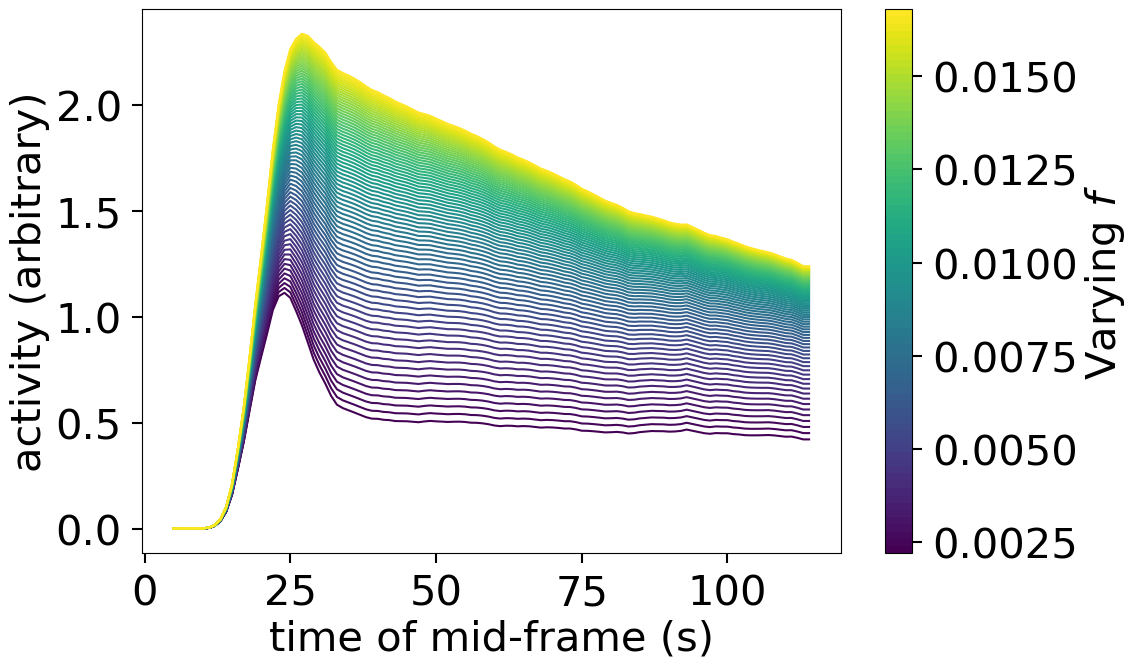

In [24]:
rm.plot_variations(0, 0.0022, 0.017 , rm.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 14628 | batch: 16 | bound: 7 | nc: 1 | ncall: 716222 | eff(%):  2.029 | loglstar: -29.699 < -25.709 < -27.257 | logz: -46.258 +/-  0.157 | stop:  0.989                                         

Parameter 0: 0.004 [0.004, 0.005]
Parameter 1: 0.972 [0.848, 1.145]
Parameter 2: 0.018 [0.009, 0.029]
Parameter 3: 17.524 [6.393, 17.899]
Parameter 4: -10.435 [-10.735, 0.590]
Parameter 5: 0.050 [0.050, 0.050]
Parameter 0: 0.004 [0.004, 0.005]
Parameter 1: 0.972 [0.848, 1.145]
Parameter 2: 0.018 [0.009, 0.029]
Parameter 3: 17.524 [6.393, 17.899]
Parameter 4: -10.435 [-10.735, 0.590]
Parameter 5: 0.050 [0.050, 0.050]


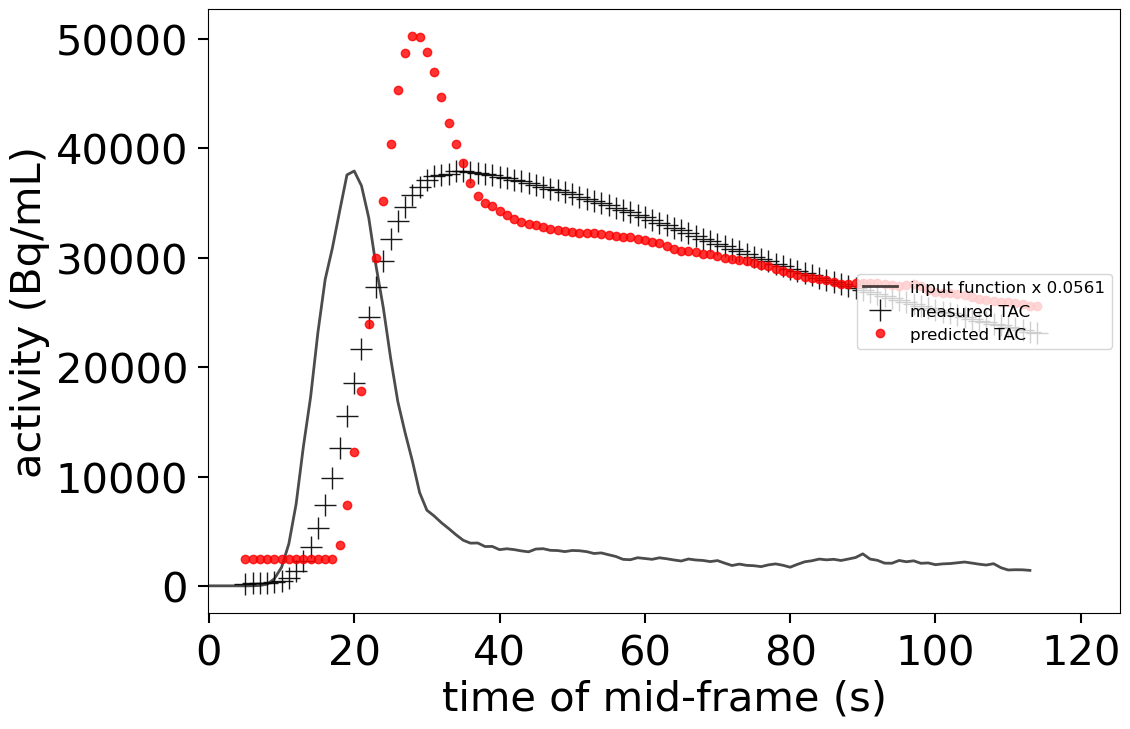

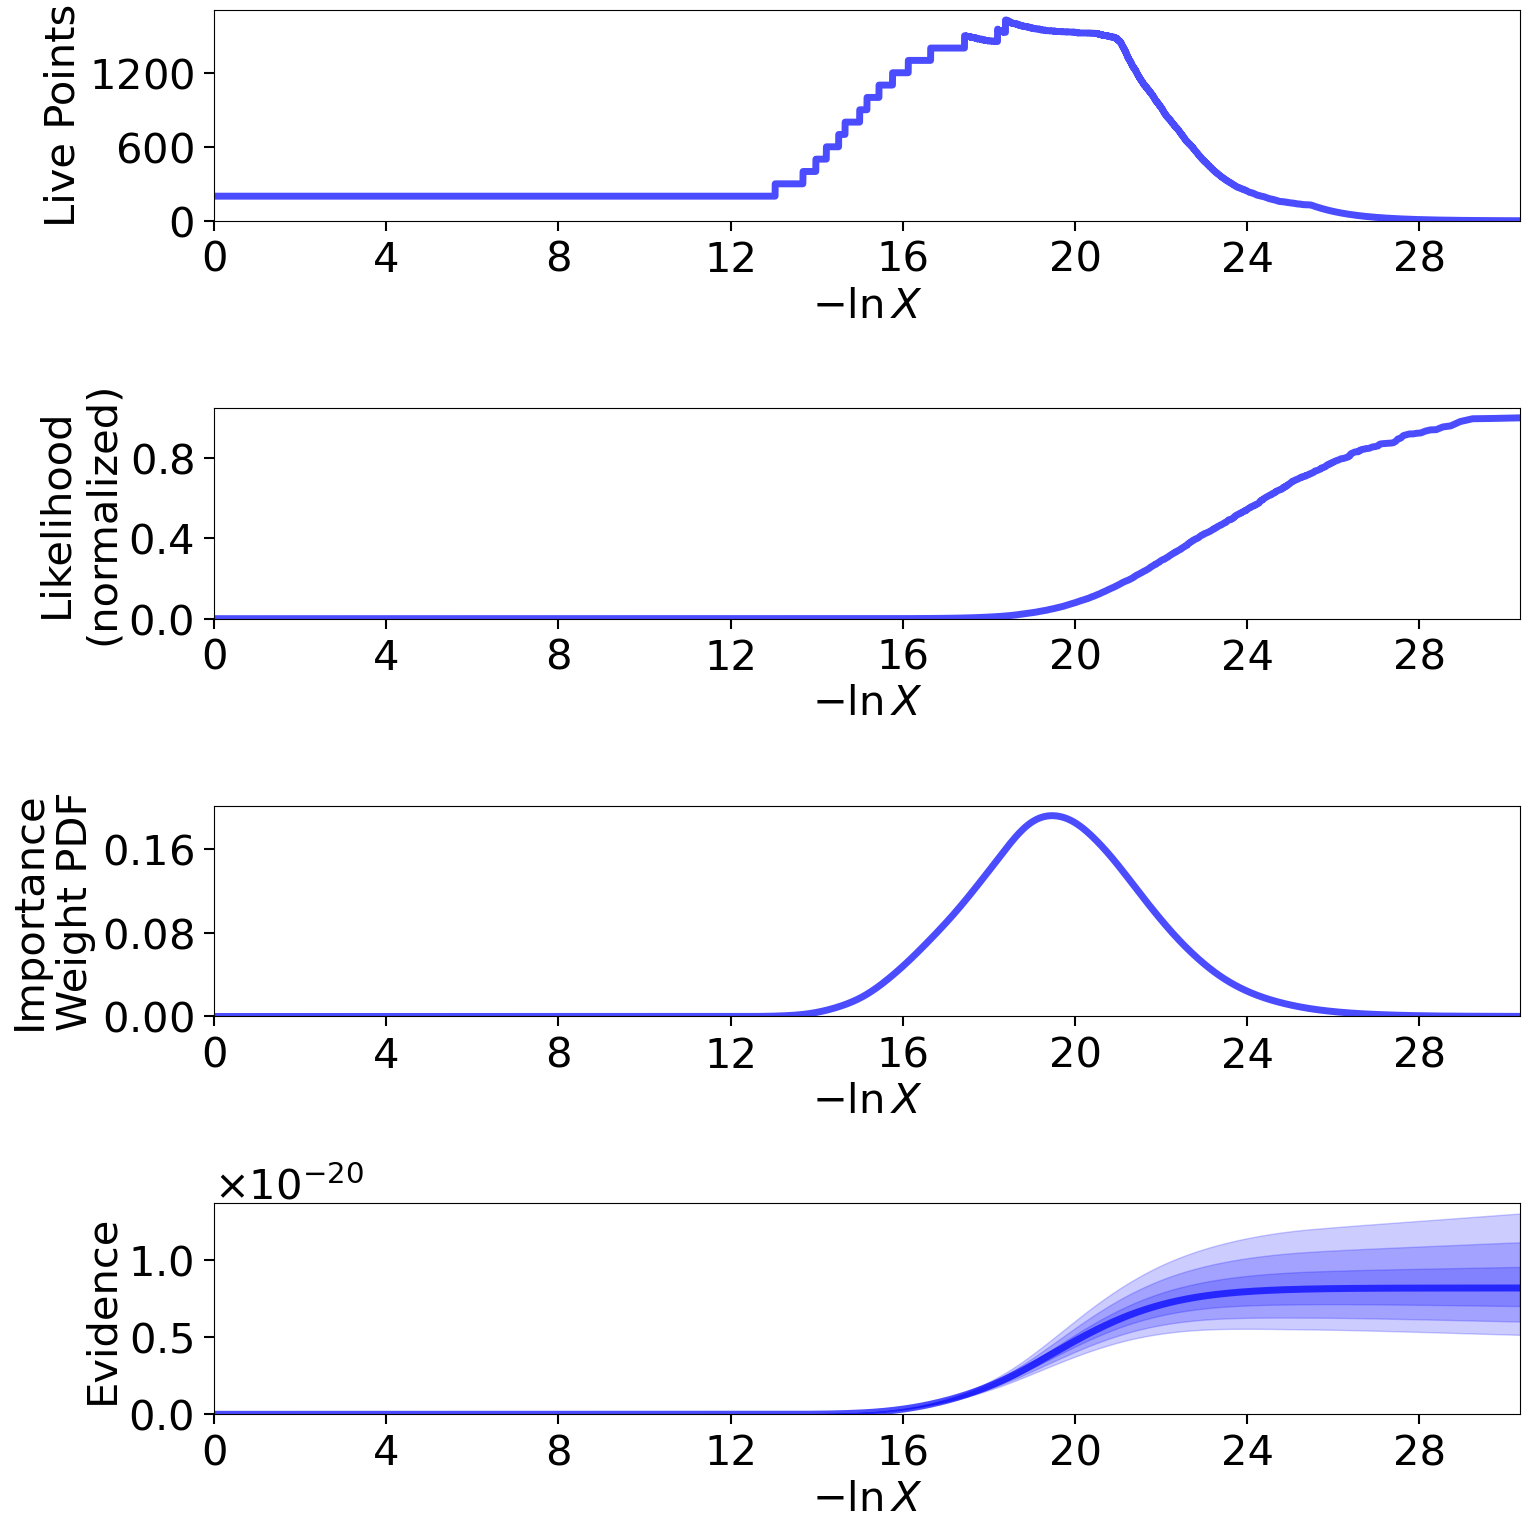

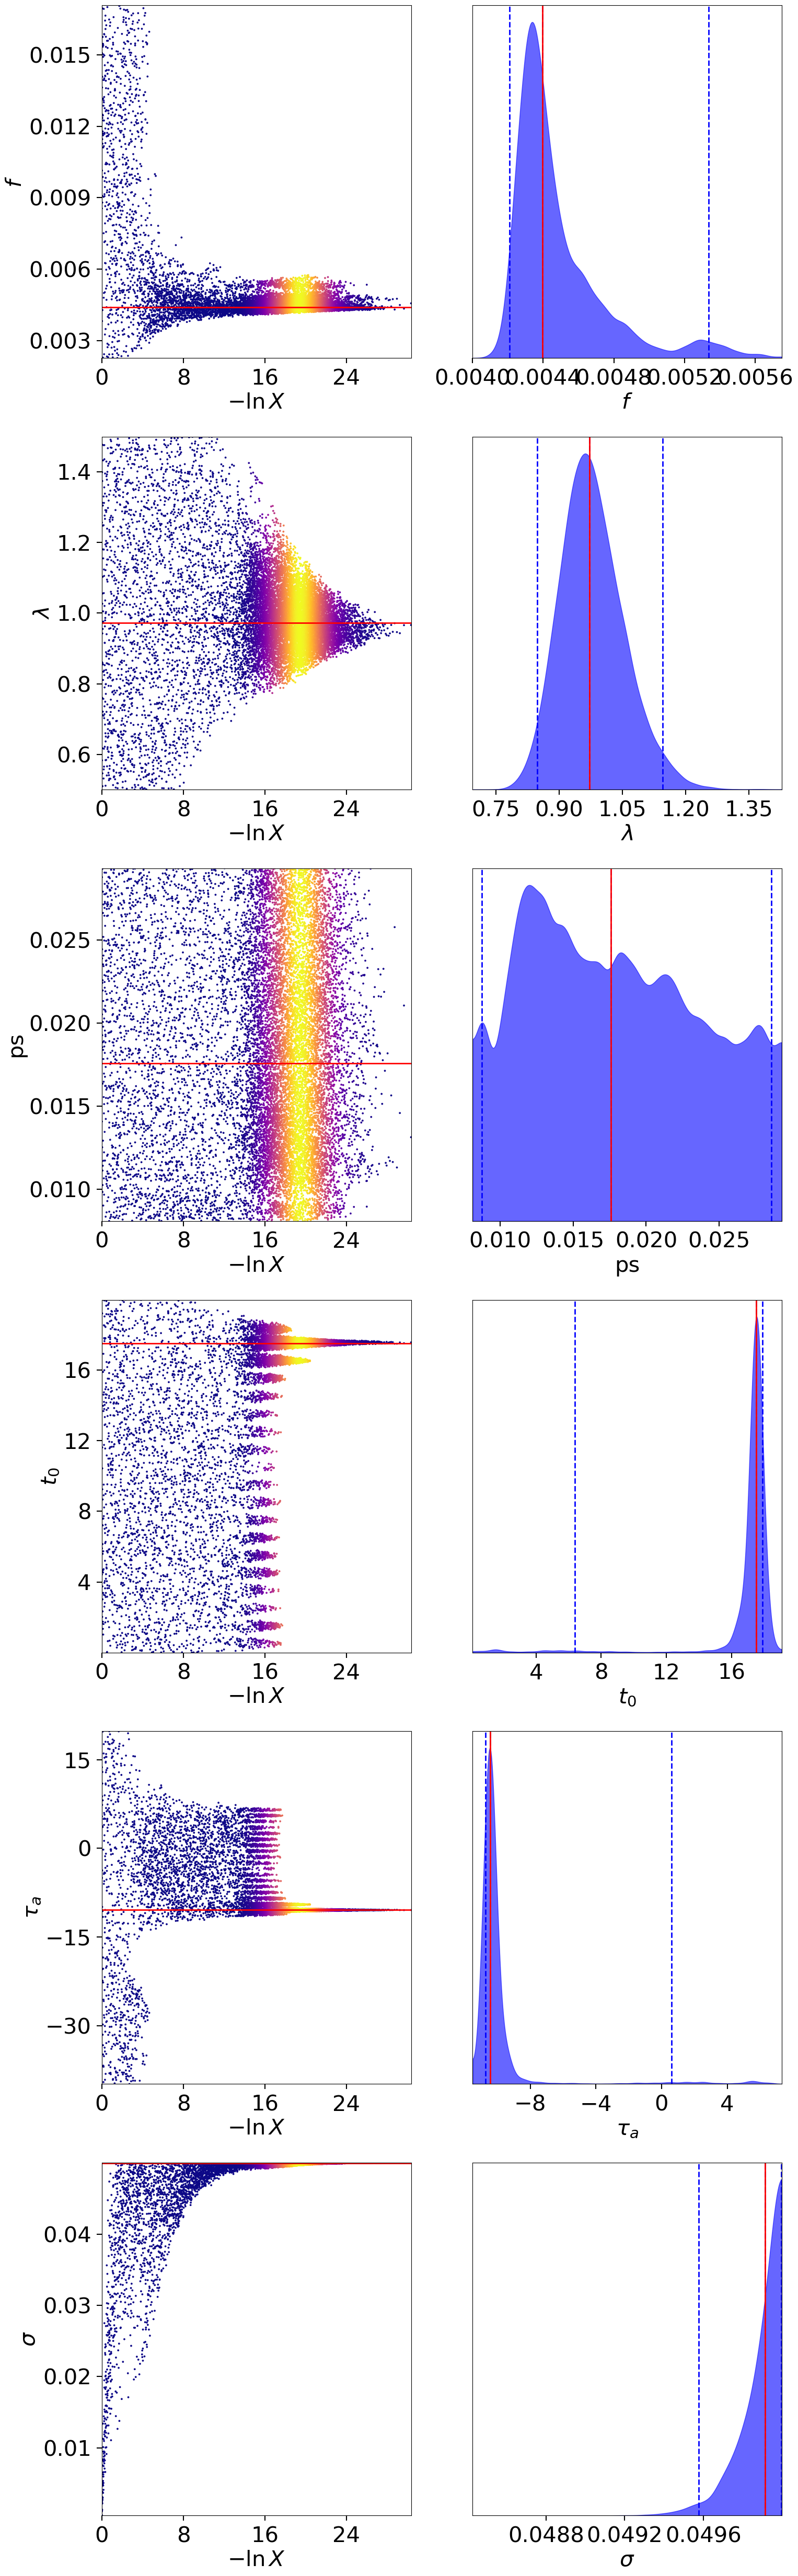

In [25]:
# de novo
res3 = rm.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(rm.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

# Misc. Testing

In [ ]:
from pympler import asizeof
asizeof.asizeof(res)

In [ ]:
res.asdict()

In [ ]:
rd = res.asdict()
rd

In [ ]:
rd["logz"][-1]

In [ ]:
rd["information"][-1]

In [ ]:
res.summary()

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

fqfn = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-wmparc.nii.gz")
nii = nib.load(fqfn)
img = nii.get_fdata()
plt.imshow(img, cmap="gray", origin="lower")
plt.figure(figsize=(12, 8))
plt.plot(img[0,], linewidth=2)